<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
link = "/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/Controles/Copia de sensor lb.csv"
dataset = pd.read_csv(link, sep = ";")
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187


In [3]:
# Determinando el número máximo de ciclos y la cateorización
dataset['vida'] = dataset.ciclo / dataset.max_ciclo
dataset["target"] = np.where(dataset.vida < 0.8,0,1)
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down,vida,target
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,0.005208,0
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,0.010417,0
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,0.015625,0
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,0.020833,0
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,0.026042,0


In [4]:
# Boorrando las variables ciclo y vida
col_borrar = ["max_ciclo","vida"]
dataset = dataset.drop(col_borrar,axis = 1)

In [5]:
# Matriz característica
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

In [6]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)


In [7]:
# Ajustamos el modelo XGBoost al Conjunto de Entrenamiento
from xgboost import XGBClassifier
modelo_clasificacion = XGBClassifier()
modelo_clasificacion.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [8]:
# Realizando una predicción
y_pred = modelo_clasificacion.predict(X_test)

In [9]:
# Elaborando una matriz de confusión
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(Y_test,y_pred)

In [10]:
matriz_confusion

array([[3288,    3],
       [   7,  829]])

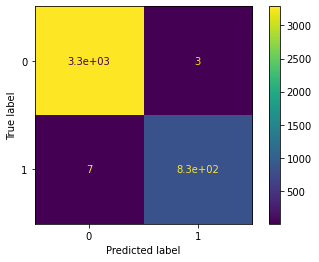

In [11]:
 from sklearn.metrics import plot_confusion_matrix, accuracy_score
 plot_confusion_matrix(modelo_clasificacion,X = X_test,y_true = Y_test)

In [12]:
accuracy_score(Y_test,y_pred)

0.9975769323964139

In [13]:
# Aplicando K-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(modelo_clasificacion,X_train,Y_train,cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.9973946368592037
0.0011511425878907467


Determinación de la impotancia de las variables

In [14]:
from xgboost import plot_importance

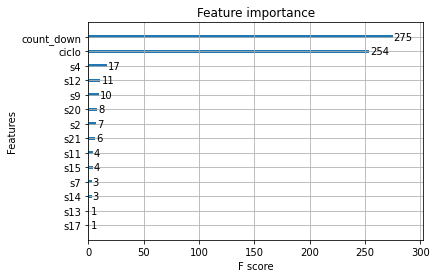

In [15]:
plot_importance(modelo_clasificacion)

Parte red neuronal

In [16]:
pip install scikit-plot 

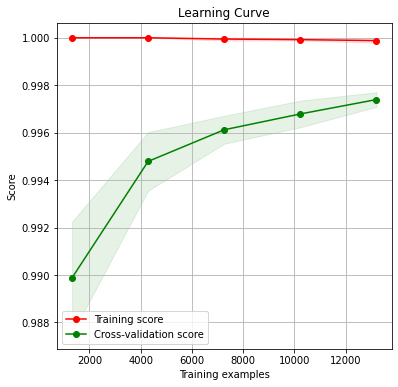

In [19]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(modelo_clasificacion,X_train,Y_train,figsize = (6,6))
#Mientras la curva roja decaiga y la curva verde suba quiere decir que no hay overfitting

Analizando coeficientes de cada una de las variables

In [20]:
pip install eli5

     |████████████████████████████████| 106 kB 13.9 MB/s 


In [22]:
# Peso de las variables en el modelo
from eli5 import show_weights
from eli5 import show_prediction
show_weights(modelo_clasificacion, top = 20)

Weight,Feature
0.8179,count_down
0.1140,ciclo
0.0132,s11
0.0115,s21
0.0082,s9
0.0058,s4
0.0050,s2
0.0045,s17
0.0044,s15
0.0041,s13
